In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import spacy
import nltk

from sklearn.model_selection import train_test_split
nlp = spacy.load("en_core_web_sm") # Loading english large corpus
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [ ]:
import os
for dirname, _, filenames in os.walk('//content/mobil_listrik.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
df = pd.read_csv("//content/mobil_listrik.csv")

In [ ]:
df.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_komentar    1517 non-null   object
 1   nama_akun      1516 non-null   object
 2   tanggal        1517 non-null   object
 3   text_cleaning  1515 non-null   object
 4   sentimen       1517 non-null   object
dtypes: object(5)
memory usage: 59.4+ KB


In [ ]:
df.isnull().sum() # We do not have null values

id_komentar      0
nama_akun        1
tanggal          0
text_cleaning    2
sentimen         0
dtype: int64

EDA

In [ ]:
df_counts = df["sentimen"].value_counts().reset_index()
df_counts.head()

,index,sentimen
0,negatif,869
1,positif,504
2,netral,144


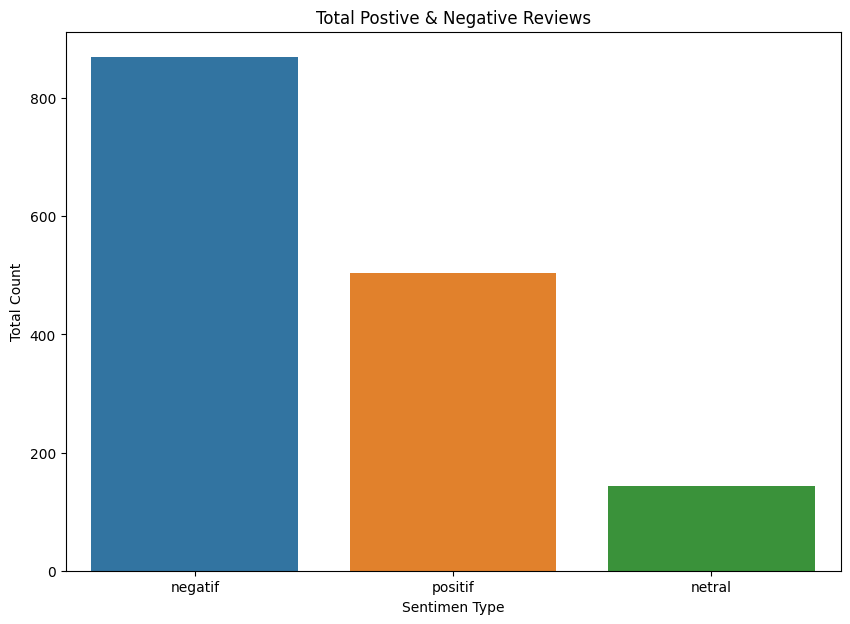

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df_counts, x='index', y='sentimen')
plt.xlabel("Sentimen Type");
plt.ylabel("Total Count");
plt.title("Total Postive & Negative Reviews");

In [ ]:
empty_review_index = []
for i, id_komentar, nama_akun, tanggal, text_cleaning, sentimen in df.itertuples():
    # if text_cleaning type is string
    if type(text_cleaning) == str:
        #if text_cleaning is empty space
        if text_cleaning.isspace():
            # Appent its index to the list
            empty_text_cleaning_index.append(i)

In [ ]:
empty_review_index # So we do not have any empty review

[]

Positive & Negative Token Count & Frequency Distribution

In [ ]:
import re # for regular expression

In [ ]:
pos_token = [] # to save positive tokens
neg_token = [] # to save negative tokens
net_token = [] # to save netral tokens
corpus=[]
noun = []
def process_reviews(df):
    for i, id_komentar, nama_akun, tanggal, text_cleaning, sentimen in df.itertuples():
        if type(text_cleaning) == str:
            text_cleaning = re.sub('[^a-zA-Z]', ' ', text_cleaning)
            text_cleaning = text_cleaning.lower()
            doc = nlp(text_cleaning)
            temp = []
            for token in doc:
                if not token.text.isspace():
                    if not token.is_stop and len(token.text) > 2:
                        if token.pos_ == 'NOUN':
                            noun.append(token.text)
                            if sentimen == 'negatif':
                              neg_token.append(token.text)
                            elif sentimen == 'positif':
                              pos_token.append(token.text)
                            else:

                                net_token.append(token.text)
                                temp.append(token.lemma_)
                                corpus.append(' '.join(temp))

In [ ]:
process_reviews(df)

In [ ]:
# all the positive token list
pos_token[0:10]

['sama',
 'motor',
 'motor',
 'beat',
 'kualitas',
 'bocil',
 'motor',
 'naik',
 'nyaman',
 'sodium']

In [ ]:
# all the negative token list
neg_token[0:10]

['problem',
 'gede',
 'model',
 'croot',
 'syarat',
 'blom',
 'iraha',
 'rakyat',
 'keluar',
 'gas']

In [ ]:
# all the negative token list
net_token[0:10]

['hybrid',
 'benar',
 'ngapain',
 'subsidi',
 'mampu',
 'bayi',
 'relokasi',
 'subsidi',
 'produk',
 'dontbestupid']

In [ ]:
from nltk import FreqDist

In [ ]:
# preparing frequency distribution variables
freq_pos = FreqDist(pos_token)
freq_neg = FreqDist(neg_token)
freq_net = FreqDist(net_token)

In [ ]:
freq_pos

FreqDist({'harga': 22, 'motor': 18, 'minat': 17, 'subsidi': 13, 'mau': 13, 'baru': 10, 'tetap': 10, 'station': 9, 'rumah': 9, 'mahal': 8, ...})

In [ ]:
freq_neg

FreqDist({'rakyat': 33, 'motor': 27, 'benar': 24, 'baru': 21, 'semua': 21, 'indo': 20, 'station': 17, 'sedikit': 16, 'baterai': 16, 'charge': 15, ...})

In [ ]:
freq_net

FreqDist({'subsidi': 8, 'motor': 4, 'umum': 3, 'station': 3, 'mampu': 2, 'baru': 2, 'buat': 2, 'semua': 2, 'rakyat': 2, 'bus': 2, ...})

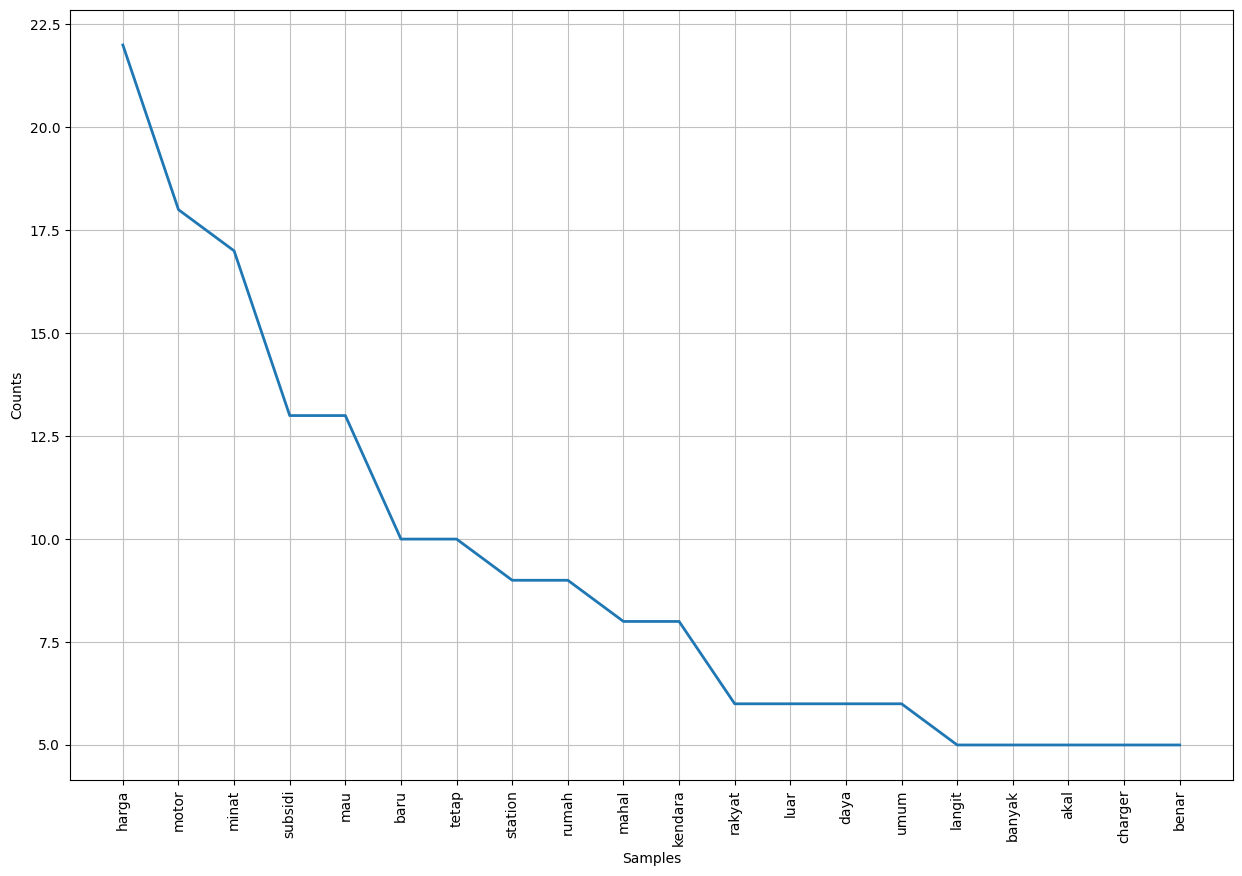

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Top 20 most repeated words in positive comments
plt.figure(figsize=(15, 10))
freq_pos.plot(20)

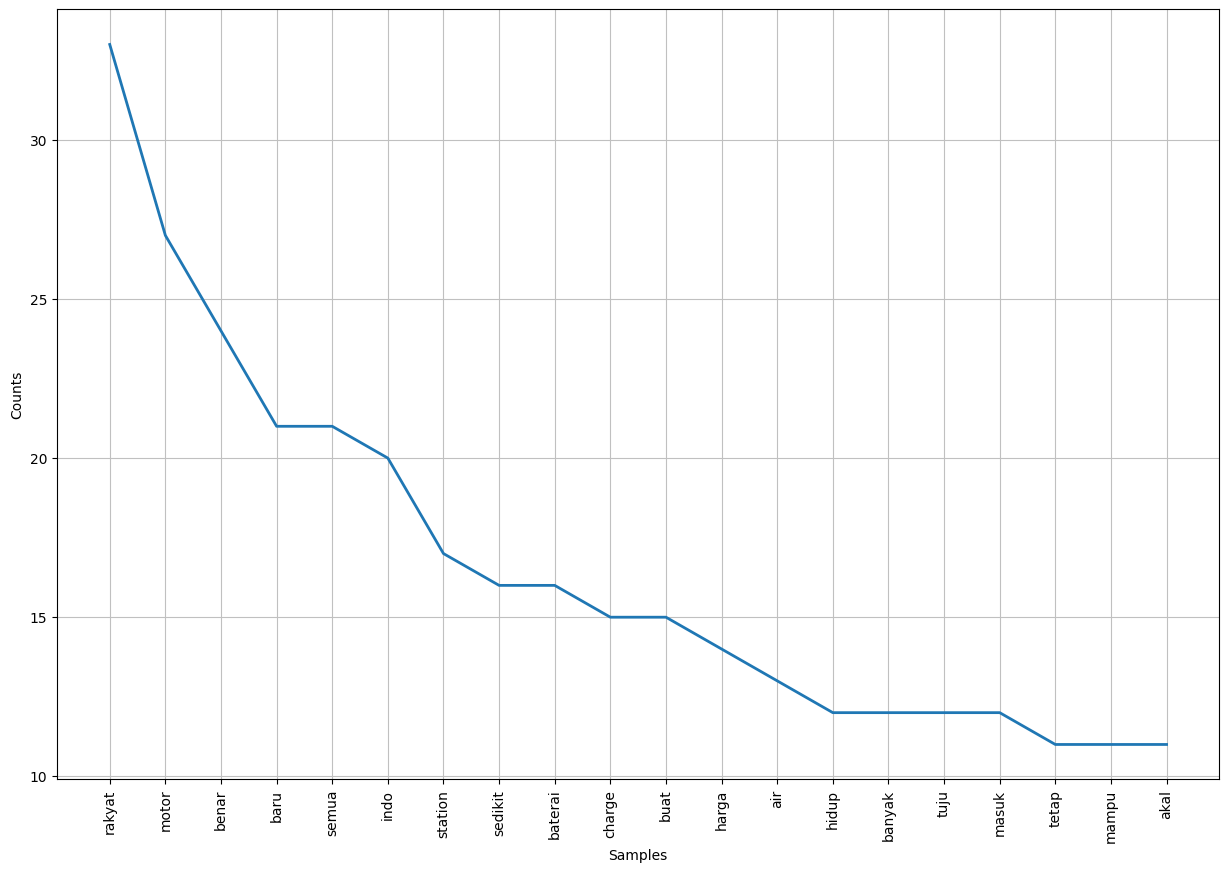

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Top 20 most repeated words in positive comments
plt.figure(figsize=(15, 10))
freq_neg.plot(20)

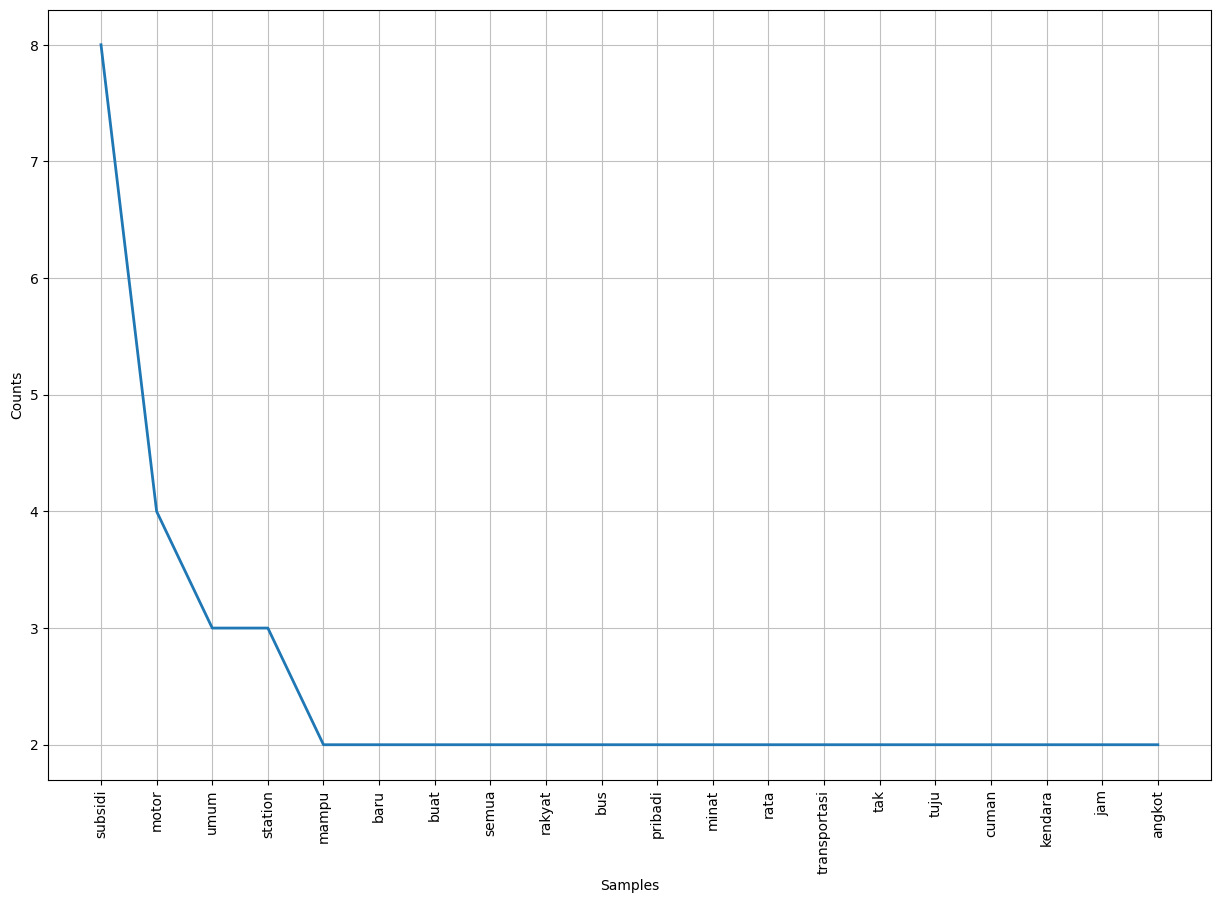

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Top 20 most repeated words in positive comments
plt.figure(figsize=(15, 10))
freq_net.plot(20)

In [ ]:
# All the nouns used in our reviews. It will give you an idea like what are the famous keywords?
noun[0:10]

['sama',
 'problem',
 'gede',
 'motor',
 'model',
 'croot',
 'syarat',
 'blom',
 'iraha',
 'motor']

Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

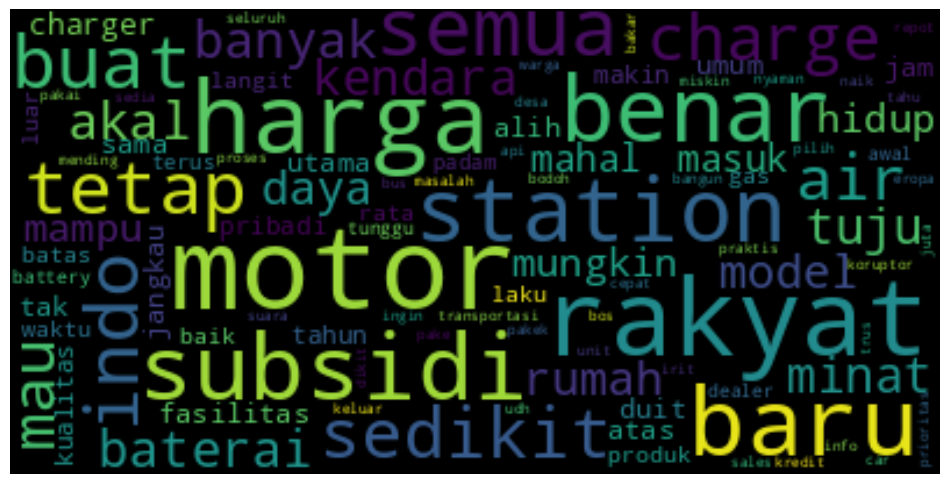

In [ ]:
# Most famous nouns used in movie reviews

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(' '.join(noun))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()